In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras

In [2]:
import os, re, glob
import cv2

In [3]:
image_dir = 'C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/'
categories = ["0","1","2","3","4"]
num_classes = len(categories)
  
# image_w = 32
# image_h = 32

X = []
Y = []

In [4]:
for top, dir, f in os.walk(image_dir):
    for filename in f:
        print(image_dir+filename)
        img = cv2.imread(image_dir+filename)
        #print(img.shape)
        img = cv2.resize(img, None, fx=0.5, fy=0.5)
        #img = cv2.resize(img,dsize=(32, 32), interpolation=cv2.INTER_AREA)
        X.append(img/255)   # 255로 바꿔야 하나??? 
        
for idex, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    for j in range(100):
        Y.append(label)

            
 
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_1.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_10.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_100.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_11.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_12.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_13.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_14.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_15.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_16.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_17.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140Z-001/audio_image_data/0_18.png
C:/Users/USER/Desktop/audio_image_data-20220209T065140

In [5]:
Y[499], Y[0], Y[100]

(array([0, 0, 0, 0, 1]), array([1, 0, 0, 0, 0]), array([0, 1, 0, 0, 0]))

In [6]:
X_train = np.concatenate((X[0:80],X[100:180],X[200:280],X[300:380],X[400:480]), axis = 0)
X_test = np.concatenate((X[80:100],X[180:200],X[280:300],X[380:400],X[480:500]), axis = 0)
Y_train = np.concatenate((Y[0:80],Y[100:180],Y[200:280],Y[300:380],Y[400:480]), axis = 0)
Y_test = np.concatenate((Y[80:100],Y[180:200],Y[280:300],Y[380:400],Y[480:500]), axis = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(400, 144, 216, 3)
(100, 144, 216, 3)
(400, 5)
(100, 5)


In [7]:
xy = (X_train, X_test, Y_train, Y_test)

np.save("./img_data.npy", xy)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D


In [16]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape= (X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(layers.Dense(128, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(5, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 144, 216, 256)     1024      
                                                                 
 dense_5 (Dense)             (None, 144, 216, 128)     32896     
                                                                 
 flatten_1 (Flatten)         (None, 3981312)           0         
                                                                 
 dense_6 (Dense)             (None, 5)                 19906565  
                                                                 
Total params: 19,940,485
Trainable params: 19,940,485
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
classifier = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=64)

Epoch 1/10
7/7 [==============================] - 51s 7s/step - loss: 92.0052 - accuracy: 0.2225
Epoch 2/10
7/7 [==============================] - 45s 6s/step - loss: 21.2471 - accuracy: 0.1975
Epoch 3/10
7/7 [==============================] - 55s 8s/step - loss: 3.3058 - accuracy: 0.2300
Epoch 4/10
7/7 [==============================] - 57s 8s/step - loss: 1.7616 - accuracy: 0.2450
Epoch 5/10
7/7 [==============================] - 47s 6s/step - loss: 1.4893 - accuracy: 0.3975
Epoch 6/10
7/7 [==============================] - 53s 7s/step - loss: 1.3223 - accuracy: 0.4750
Epoch 7/10
7/7 [==============================] - 53s 7s/step - loss: 1.0690 - accuracy: 0.6100
Epoch 8/10
7/7 [==============================] - 57s 8s/step - loss: 0.8273 - accuracy: 0.7225
Epoch 9/10
7/7 [==============================] - 56s 7s/step - loss: 0.6122 - accuracy: 0.8050
Epoch 10/10
7/7 [==============================] - 51s 7s/step - loss: 0.4764 - accuracy: 0.8025


In [31]:
model.metrics_names

['loss', 'accuracy']

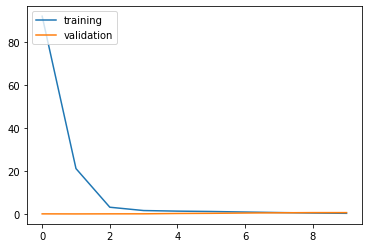

In [33]:
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('테스트 정확도:', test_acc)

4/4 - 5s - loss: 0.9011 - accuracy: 0.5900 - 5s/epoch - 1s/step
테스트 정확도: 0.5899999737739563


In [29]:
X_test[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [41]:
prediction = model.predict(X_test)

In [42]:
prediction

array([[5.75327039e-01, 3.16231936e-01, 2.05787551e-02, 2.36685239e-02,
        6.41936809e-02],
       [6.86589062e-01, 7.77619183e-02, 2.91055981e-02, 4.42209020e-02,
        1.62322506e-01],
       [2.91450739e-01, 1.34354457e-01, 3.68615575e-02, 3.75957936e-02,
        4.99737412e-01],
       [5.64331055e-01, 3.10157239e-01, 2.14319825e-02, 3.40859741e-02,
        6.99937269e-02],
       [9.59914923e-01, 3.39920558e-02, 2.55809398e-03, 4.42809484e-04,
        3.09210015e-03],
       [6.72161222e-01, 1.08645238e-01, 1.35199763e-02, 7.01287463e-02,
        1.35544866e-01],
       [7.74366319e-01, 1.81474406e-02, 1.07790744e-02, 1.58224534e-02,
        1.80884793e-01],
       [3.74886721e-01, 1.08713150e-01, 1.74848139e-02, 2.87091788e-02,
        4.70206112e-01],
       [6.41420603e-01, 2.14109749e-01, 2.20335834e-02, 6.31463975e-02,
        5.92897236e-02],
       [9.39853847e-01, 3.76064144e-02, 6.33239560e-03, 2.27560150e-03,
        1.39317159e-02],
       [9.29815531e-01, 1.8494

In [43]:
prediction.shape

(100, 5)

In [45]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[0 0 4 0 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 3 1 3 1 1 3 1 1
 2 3 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [46]:
classes.shape

(100,)

In [48]:
labels = np.argmax(Y_test, axis=1)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
# 알고리즘 0, 1, 4는 거의 다 맞추는데 2와 3을 1과 잘 구분 못 함